![](../docs/banner.png)

# Trực quan hóa dữ liệu
<hr>

Việc tạo ra các hình ảnh trực quan chứa đựng thông tin, thường được gọi là đồ thị, là một trong những nhiệm vụ quan trọng nhất trong phân tích dữ liệu. Trực quan hóa có thể đóng vai trò là một phần của quá trình khám phá dữ liệu – ví dụ, nhằm xác định các điểm ngoại lai hoặc gợi ý những phép biến đổi cần thiết cho dữ liệu đầu vào, hoặc đơn giản là nhằm tìm kiếm ý tưởng cho việc xây dựng mô hình phân tích. Trong một số tình huống khác, mục tiêu cuối cùng có thể là xây dựng một hình ảnh trực quan có tính tương tác để trình bày trên nền tảng web.

Python cung cấp nhiều thư viện hỗ trợ trực quan hóa dữ liệu, cả dưới dạng biểu đồ tĩnh lẫn biểu đồ động. Tuy nhiên, trong phạm vi cuốn sách này, chúng ta sẽ tập trung chủ yếu vào thư viện `matplotlib` và các thư viện được xây dựng trên nền tảng của nó.

**matplotlib** là một thư viện phần mềm vẽ đồ thị trên máy tính để bàn, được thiết kế để tạo ra các biểu đồ chất lượng cao phù hợp cho việc công bố và in ấn. Dự án này được khởi xướng bởi John Hunter vào năm 2002 với mục tiêu xây dựng một giao diện vẽ đồ thị tương tự như MATLAB trong ngôn ngữ Python. Nhờ sự hợp tác chặt chẽ giữa cộng đồng phát triển matplotlib và IPython, việc tạo ra các biểu đồ tương tác từ môi trường IPython shell, và hiện nay là Jupyter notebook, đã trở nên dễ dàng hơn rất nhiều.

matplotlib hỗ trợ nhiều giao diện người dùng trên tất cả các hệ điều hành chính, và cho phép xuất đồ thị sang nhiều định dạng đồ họa phổ biến, cả dạng vector và raster, bao gồm: PDF, SVG, JPG, PNG, BMP, GIF, v.v.. Ngoại trừ một số sơ đồ minh họa đặc biệt, hầu hết các biểu đồ trong cuốn sách này đều được tạo bằng matplotlib.

Theo thời gian, matplotlib đã trở thành nền tảng cho nhiều thư viện bổ trợ khác nhằm mở rộng khả năng trực quan hóa. Một trong những thư viện nổi bật đó là `seaborn`, mà chúng ta sẽ khám phá trong phần sau của chương này.

Cách đơn giản nhất để theo dõi các ví dụ minh họa trong chương là hiển thị đồ thị ngay trong Jupyter notebook. Để thực hiện điều đó, hãy chạy lệnh sau trong một ô của notebook:

In [1]:
%matplotlib inline

**Lưu ý**

Nhiều thư viện trực quan hóa dữ liệu tận dụng công nghệ web hiện đại để tạo ra các hình ảnh trực quan tương tác tích hợp tốt với Jupyter notebook. Thay vì sử dụng nhiều công cụ trực quan hóa trong cuốn sách này, chúng tôi quyết định gắn bó với matplotlib để dạy các nguyên tắc cơ bản, đặc biệt là vì pandas có tích hợp tốt với matplotlib. Bạn cũng có thể điều chỉnh các nguyên tắc từ chương này để học cách sử dụng các thư viện trực quan hóa khác.

## Vẽ đồ thị cơ bản với matplotlib
<hr>

Với matplotlib, chúng ta sử dụng quy ước import sau:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Sau khi chạy `%matplotlib notebook` trong Jupyter (hoặc đơn giản là `%matplotlib` trong IPython), chúng ta có thể thử tạo một đồ thị đơn giản. Nếu mọi thứ được thiết lập đúng, một đồ thị đường như *Đồ thị đường đơn giản* sẽ xuất hiện:

In [4]:
data = np.arange(100)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

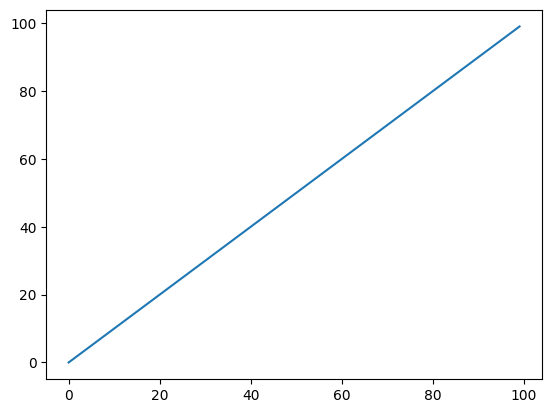

In [5]:
plt.plot(data)

Trong khi các thư viện như `seaborn` và các hàm vẽ đồ thị tích hợp sẵn của `pandas` sẽ xử lý nhiều chi tiết thông thường của việc tạo đồ thị, nếu bạn muốn tùy chỉnh chúng vượt ra ngoài các tùy chọn hàm được cung cấp, bạn sẽ cần học một chút về API matplotlib.

### Hình (figures) và đồ thị con (subplots)
<hr>

Các đồ thị trong `matplotlib` nằm trong một đối tượng được gọi là `Figure`. Bạn có thể tạo một hình mới bằng `plt.figure`:

In [6]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Trong IPython, nếu bạn chạy `%matplotlib` trước để thiết lập tích hợp matplotlib, một cửa sổ đồ thị trống sẽ xuất hiện, nhưng trong Jupyter sẽ không có gì được hiển thị cho đến khi chúng ta sử dụng thêm một vài lệnh.

`plt.figure` có một số tùy chọn, chẳng hạn như `figsize` sẽ đảm bảo hình có kích thước và tỷ lệ khung hình nhất định nếu được lưu vào máy.

Bạn không thể tạo một đồ thị với một hình trống. Bạn phải tạo một đồ thị hoặc nhiều đồ thị con hoặc bằng cách sử dụng `add_subplot`:

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

Điều này có nghĩa là tạo ra khung hình 2 × 2 (tức là tối đa bốn đồ thị), và chúng ta đang chọn subplot đầu tiên trong số bốn subplot (được đánh số từ 1). Nếu bạn tạo hai subplot tiếp theo, bạn sẽ có một hình trực quan trống với ba đồ thị con như sau:

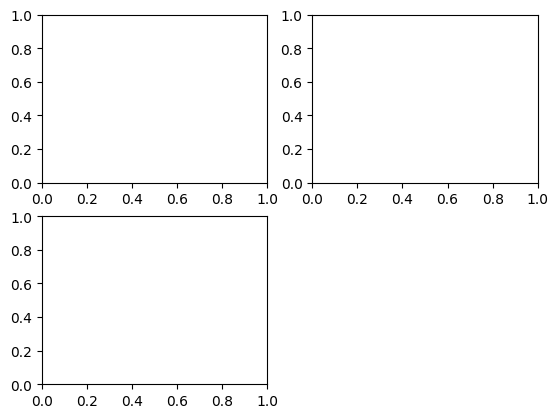

In [8]:
fig = plt.figure() # Phải tạo lại fig vì cell trước có thể đã được thực thi riêng
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.show() # Để hiển thị hình

**Lưu ý**

Khi sử dụng Jupyter notebooks là các đồ thị được đặt lại sau mỗi ô, vì vậy bạn phải đặt tất cả các lệnh vẽ đồ thị vào một ô notebook duy nhất.

Ở trên chúng ta đã chạy tất cả các lệnh này trong cùng một ô:

Các đối tượng trục đồ thị này có nhiều phương thức khác nhau để tạo ra các loại đồ thị khác nhau, và ưu tiên sử dụng các phương thức trục hơn là các hàm vẽ đồ thị cấp cao nhất như `plt.plot`. Ví dụ, chúng ta có thể tạo một đồ thị dạng đường bằng phương thức `plot`:

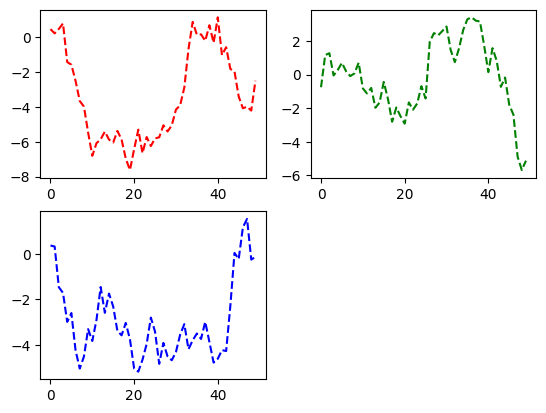

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.plot(np.random.standard_normal(50).cumsum(), color="red", linestyle="dashed")
ax2.plot(np.random.standard_normal(50).cumsum(), color="green", linestyle="dashed")
ax3.plot(np.random.standard_normal(50).cumsum(), color="blue", linestyle="dashed")
plt.show()

Các đối tượng được trả về bởi `fig.add_subplot` ở trên, bao gồm `ax1`, `ax2`, và `ax3` còn được gọi là các đối tượng `AxesSubplot`. Trên các đối tượng này bạn có thể vẽ trực tiếp trên các subplot trống khác bằng cách gọi phương thức khác nhau của mỗi subplot. Bạn đọc tham khảo phần tiếp theo của chương để biết về các phương thức này:

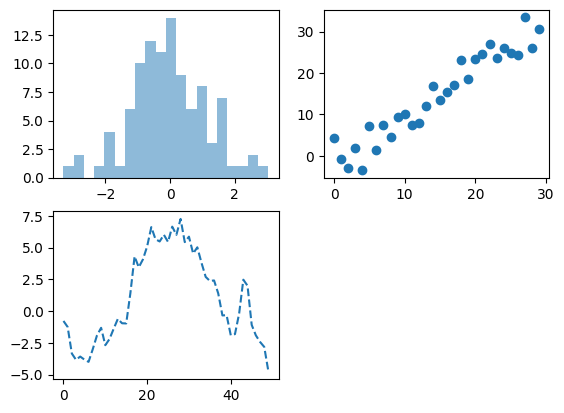

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.standard_normal(100), bins=20, alpha=0.5);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));
ax3.plot(np.random.standard_normal(50).cumsum(),  linestyle="dashed")
plt.show()

Tùy chọn `alpha=0.5` sử dụng trong `ax1` chỉ định độ trong suốt của đồ thị.

Bạn có thể tìm thấy một danh mục toàn diện các loại đồ thị trong tài liệu [matplotlib](https://matplotlib.org/)

Để tạo một lưới các subplot thuận tiện hơn, matplotlib bao gồm một phương thức `plt.subplots` tạo một hình mới và trả về một mảng NumPy chứa các đối tượng subplot đã tạo:

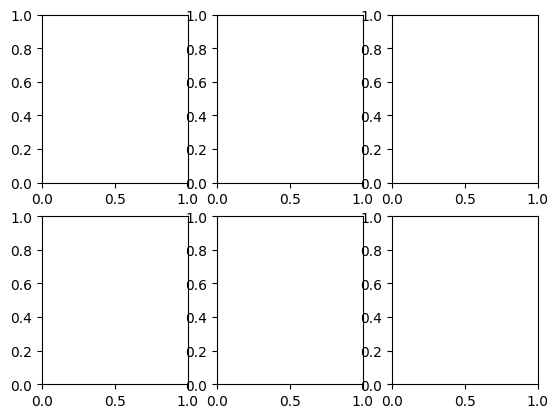

In [13]:
fig, axes = plt.subplots(2, 3)
axes
plt.show()

Mảng `axes` sau đó có thể được lập chỉ mục giống như một mảng hai chiều; ví dụ, `axes[0, 1]` tham chiếu đến subplot ở hàng trên cùng ở giữa. Bạn đọc cũng có thể chỉ ra rằng các subplot nên có cùng trục x hoặc y tương ứng bằng cách sử dụng `sharex` và `sharey`. Điều này có thể hữu ích khi bạn đang so sánh dữ liệu trên cùng một thang đo; nếu không, matplotlib sẽ tự động điều chỉnh giới hạn đồ thị một cách độc lập. Xem bảng ... để biết thêm về phương thức này.

**Bảng ... Các tùy chọn matplotlib.pyplot.subplots**

| Đối số      | Mô tả                                                                                                |
|---------------|------------------------------------------------------------------------------------------------------|
| `nrows`       | Số hàng của các subplot                                                                             |
| `ncols`       | Số cột của các subplot                                                                              |
| `sharex`      | Tất cả các subplot nên sử dụng cùng một vạch chia trục x (điều chỉnh `xlim` sẽ ảnh hưởng đến tất cả các subplot) |
| `sharey`      | Tất cả các subplot nên sử dụng cùng một vạch chia trục y (điều chỉnh `ylim` sẽ ảnh hưởng đến tất cả các subplot) |
| `subplot_kw`  | Từ điển các từ khóa được truyền cho lệnh gọi `add_subplot` được sử dụng để tạo mỗi subplot                  |
| `**fig_kw`    | Các từ khóa bổ sung cho `subplots` được sử dụng khi tạo hình, chẳng hạn như `plt.subplots(2, 2, figsize=(8, 6))` |


### Điều chỉnh khoảng cách xung quanh các subplot
<hr>

Theo mặc định, `matplotlib` để lại một khoảng đệm nhất định xung quanh bên ngoài các subplot và khoảng cách giữa các subplot. Khoảng cách này đều được chỉ định tương đối với chiều cao và chiều rộng của đồ thị, do đó nếu bạn thay đổi kích thước đồ thị theo chương trình hoặc thủ công bằng cửa sổ GUI, đồ thị sẽ tự động điều chỉnh. Bạn có thể thay đổi khoảng cách bằng phương thức `subplots_adjust` trên các đối tượng `Figure`:

`subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`

`wspace` và `hspace` kiểm soát phần trăm chiều rộng và chiều cao của hình, tương ứng, để sử dụng làm khoảng cách giữa các subplot. Đây là một ví dụ nhỏ bạn có thể thực thi trong Jupyter, nơi chúng tôi thu nhỏ khoảng cách giữa các đồ thị con xuống bằng không:

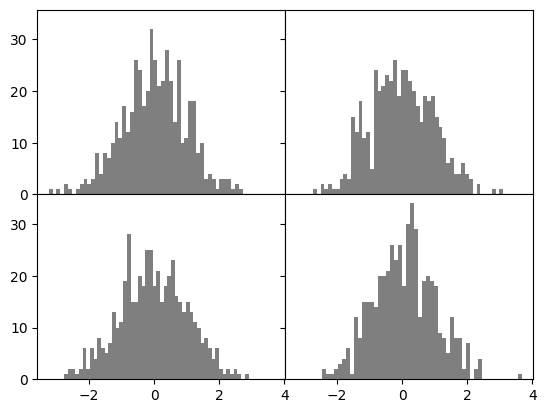

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

Bạn có thể nhận thấy rằng các nhãn trục chồng chéo lên nhau. matplotlib không kiểm tra xem các nhãn có chồng chéo hay không, vì vậy trong trường hợp như thế này, bạn sẽ cần tự sửa các nhãn bằng cách chỉ định các vị trí vạch chia và nhãn vạch chia rõ ràng (chúng ta sẽ xem xét cách thực hiện điều này trong phần sau *Vạch chia, Nhãn và Chú giải*).

### Màu sắc, điểm đánh dấu, kiểu line
<hr>

Hàm vẽ đồ thị đường của matplotlib chấp nhận các mảng tọa độ x và y và các tùy chọn tạo kiểu màu tùy chọn. Ví dụ, để vẽ x và y bằng các đường gạch ngang màu xanh dương, bạn sẽ thực thi:

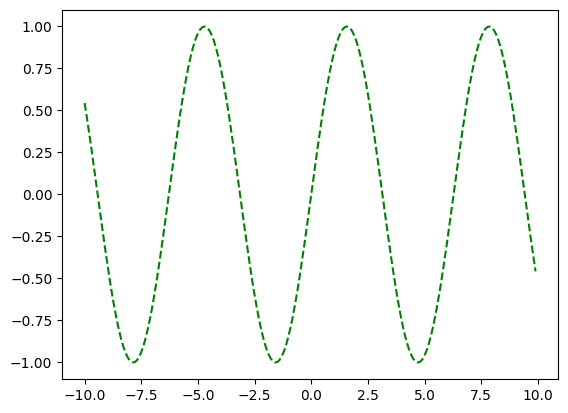

In [16]:
# Giả sử x và y đã được định nghĩa
x = np.arange(-10, 10, 0.1)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y, linestyle="--", color="blue")
plt.show() 

Một số tên màu được cung cấp cho các màu thường được sử dụng, nhưng bạn có thể sử dụng bất kỳ màu nào trên phổ màu bằng cách chỉ định mã hex, ví dụ: `"#640000"`. Bạn có thể xem một số kiểu đường được hỗ trợ bằng cách xem docstring cho `plt.plot`. Bạn đọc sử dụng `plt.plot?` trong IPython hoặc Jupyter để xem docstring.

Các đồ thị đường có thể có thêm các điểm đánh dấu để làm nổi bật các điểm dữ liệu thực tế. Vì hàm `plot` của matplotlib tạo ra một đồ thị đường liên tục, nội suy giữa các điểm, đôi khi có thể không rõ ràng vị trí các điểm nằm ở đâu. Điểm đánh dấu có thể được cung cấp dưới dạng một tùy chọn tạo kiểu bổ sung:

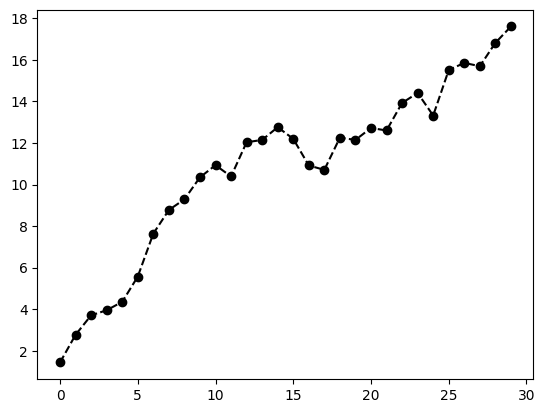

In [17]:
fig = plt.figure() # Cần tạo figure mới
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o");
plt.show()

Đối với các đồ thị đường, bạn sẽ nhận thấy rằng các điểm tiếp theo được nội suy tuyến tính theo mặc định. Điều này có thể được thay đổi bằng tùy chọn `drawstyle`:

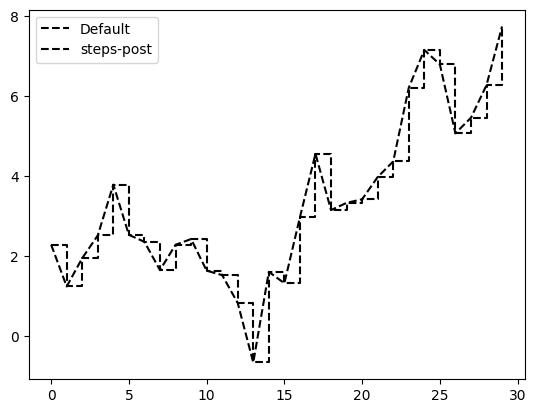

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post");
ax.legend()
plt.show()

Ở đây, vì chúng ta đã sử dụng các tham số `label` cho `plot`, chúng ta có thể tạo một chú giải đồ thị để xác định mỗi dòng bằng cách sử dụng `ax.legend`. Chúng ta sẽ thảo luận thêm về chú giải trong phần *Vạch chia (ticks), nhãn (labels) và chú giải (legends)*.

**Lưu ý**

Bạn phải gọi `ax.legend` để tạo chú giải, cho dù bạn có truyền các tùy chọn `label` khi vẽ dữ liệu hay không.

### Ticks, labels, và legends
<hr>

Hầu hết các kiểu trang trí đồ thị có thể được truy cập thông qua các phương thức trên các đối tượng trục matplotlib. Điều này bao gồm các phương thức như `xlim`, `xticks`, và `xticklabels`. Chúng kiểm soát phạm vi đồ thị, vị trí vạch chia và nhãn vạch chia, tương ứng. Chúng có thể được sử dụng theo hai cách:

*   Gọi không có đối số trả về giá trị tham số hiện tại (ví dụ: `ax.xlim()` trả về phạm vi vẽ trục x hiện tại)
*   Gọi với các tham số đặt giá trị tham số (ví dụ: `ax.xlim([0, 10])` đặt phạm vi trục x thành 0 đến 10)

Tất cả các phương thức như vậy đều hoạt động trên `AxesSubplot` đang hoạt động hoặc được tạo gần đây nhất. Mỗi phương thức tương ứng với hai phương thức trên chính đối tượng subplot; trong trường hợp `xlim`, đó là `ax.get_xlim` và `ax.set_xlim`.

#### Đặt tiêu đề, nhãn trục, vạch chia và nhãn vạch chia

Để minh họa việc tùy chỉnh các trục, tôi sẽ tạo một hình đơn giản và đồ thị của một bước đi ngẫu nhiên:

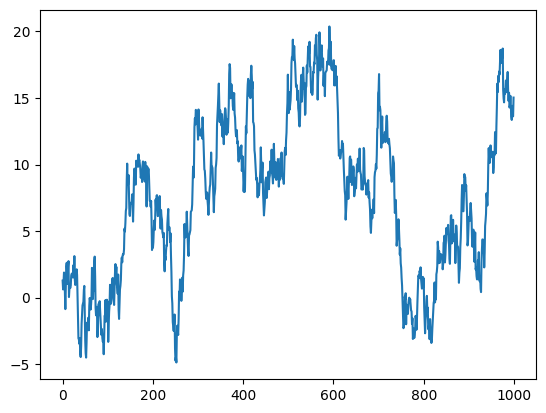

In [19]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
plt.show()

Để thay đổi các vạch chia trục x, cách dễ nhất là sử dụng `set_xticks` và `set_xticklabels`. Lệnh đầu tiên hướng dẫn matplotlib đặt các vạch chia ở đâu dọc theo phạm vi dữ liệu; theo mặc định, các vị trí này cũng sẽ là các nhãn. Nhưng chúng ta có thể đặt bất kỳ giá trị nào khác làm nhãn bằng cách sử dụng `set_xticklabels`:

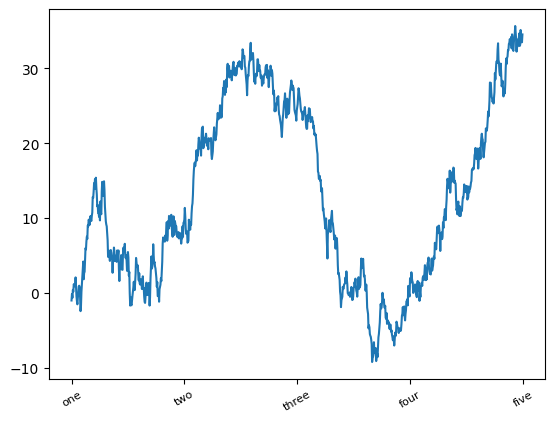

In [20]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)
plt.show()

Tùy chọn `rotation` đặt các nhãn vạch chia x ở một góc xoay 30 độ. Cuối cùng, `set_xlabel` đặt tên cho trục x và `set_title` là tiêu đề subplot:

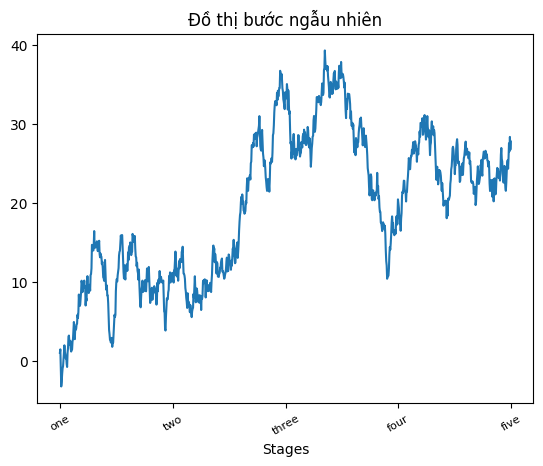

In [22]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

ax.set_xlabel("Stages")
ax.set_title("Đồ thị bước ngẫu nhiên")
plt.show()

Việc sửa đổi trục y bao gồm quy trình tương tự, thay thế y bằng x trong ví dụ này. Lớp `axes` có một phương thức `set` cho phép đặt hàng loạt các thuộc tính đồ thị. Từ ví dụ trước, chúng ta cũng có thể viết:

`ax.set(title="My first matplotlib plot", xlabel="Stages")`

#### Thêm chú giải

Chú giải là một yếu tố quan trọng khác để xác định các thành phần của đồ thị. Có một vài cách để thêm một chú giải. Cách dễ nhất là truyền tham số  `label` khi thêm mỗi phần của đồ thị:

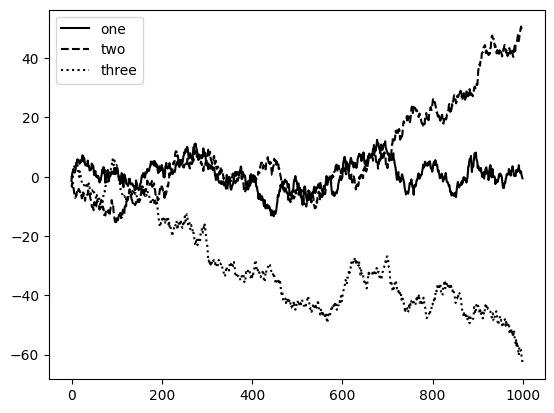

In [23]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three");

ax.legend()
plt.show()

Phương thức `legend` có một số lựa chọn khác cho đối số vị trí `loc`. Bạn đọc có thể xem docstring với `ax.legend?` để biết thêm thông tin.

Tùy chọn `loc` của chú giải cho matplotlib biết vị trí đặt đồ thị. Mặc định là `"best"`, nghĩa là cố gắng chọn một vị trí ít bị cản trở nhất. Để loại trừ một hoặc nhiều yếu tố khỏi chú giải, bạn đọc không sử dụng tham số `label` hoặc sử dụng tham số như sau `label="_nolegend_"`.

### Chú thích vẽ trên một đồ thị con
<hr>

Ngoài các loại đồ thị tiêu chuẩn, bạn có thể muốn vẽ các chú thích đồ thị của riêng mình, có thể bao gồm văn bản, mũi tên hoặc các hình dạng khác. Bạn có thể thêm chú thích và văn bản bằng các hàm `text`, `arrow`, và `annotate`. Hàm `text` vẽ văn bản tại các tọa độ (x, y) đã cho trên đồ thị với kiểu tùy chỉnh tùy chọn:

`ax.text(x, y, "Hello world!", family="monospace", fontsize=10)`

Chú thích có thể vẽ cả văn bản và mũi tên được sắp xếp phù hợp. Ví dụ, hãy vẽ đồ thị giá đóng cửa của chỉ số S&P 500 kể từ năm 2007 (lấy từ Yahoo! Finance) và chú thích nó với một số ngày quan trọng từ cuộc khủng hoảng tài chính 2008–2009. Bạn có thể chạy ví dụ mã này trong một ô duy nhất trong Jupyter notebook. Xem *Các ngày quan trọng trong cuộc khủng hoảng tài chính 2008–2009* cho kết quả:

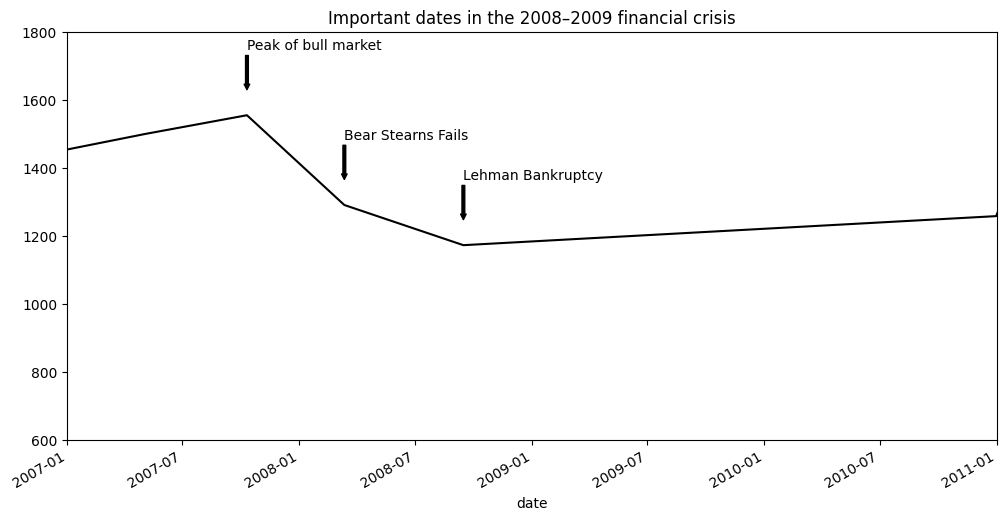

In [24]:
from datetime import datetime
# Create spx.csv file for the example
spx_csv_content = "date,SPX\n2003-01-02,909.03\n2007-05-04,1499.26\n2007-10-11,1554.41\n2008-03-12,1290.35\n2008-09-15,1172.22\n2010-12-31,1257.64\n2011-01-03,1271.87"
with open("spx.csv", "w") as f:
    f.write(spx_csv_content)

fig, ax = plt.subplots(figsize=(12, 6)) # Tăng kích thước để dễ nhìn hơn
data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left",
                verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008–2009 financial crisis")
plt.show()

Có một vài điểm quan trọng cần làm nổi bật trong đồ thị này. Phương thức `ax.annotate` có thể vẽ các nhãn tại các tọa độ x và y được chỉ định. Chúng ta sử dụng các phương thức `set_xlim` và `set_ylim` để đặt thủ công các ranh giới bắt đầu và kết thúc cho đồ thị thay vì sử dụng mặc định của matplotlib. Cuối cùng, `ax.set_title` thêm một tiêu đề chính cho đồ thị.

Bạn đọc có thể xem thư viện matplotlib trực tuyến để biết nhiều ví dụ chú thích khác.

Việc vẽ các hình dạng đòi hỏi sự cẩn thận và tỉ mỉ hơn. `matplotlib` có các đối tượng đại diện cho nhiều hình dạng phổ biến, được gọi là các `patches`. Một số trong số này, như `Rectangle` và `Circle`, được tìm thấy trong `matplotlib.pyplot`, nhưng thông tin đầy đủ nằm trong `matplotlib.patches`.

Để thêm một hình dạng vào đồ thị, bạn tạo đối tượng `patches` và thêm nó vào một đồ thị con `ax` bằng cách truyền đối tượng `patches` cho `ax.add_patch`:

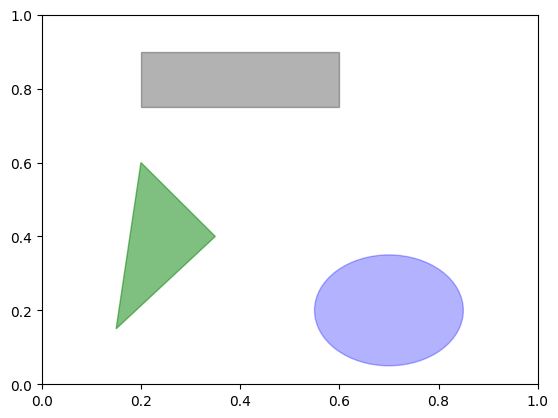

In [25]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

Nếu bạn xem xét việc triển khai nhiều loại đồ thị quen thuộc, bạn sẽ thấy rằng chúng được lắp ráp từ nhiều `patches` khác nhau.

### Lưu đồ thị vào máy tính
<hr>

Bạn đọc có thể lưu hình đang hoạt động vào tệp bằng phương thức `savefig` của đối tượng này. Ví dụ, để lưu một hình dưới định dạng `.svg`, bạn chỉ cần nhập:

`fig.savefig("figpath.svg")`

Loại tệp được suy ra từ phần mở rộng của tệp. Vì vậy, nếu bạn sử dụng `.pdf` thay vào đó, bạn sẽ nhận được một tệp PDF. Một tùy chọn quan trọng mà chúng tôi thường xuyên sử dụng để xuất bản đồ họa là `dpi`, kiểm soát độ phân giải điểm trên mỗi inch. Để có được cùng một đồ thị dưới dạng PNG ở 400 DPI, bạn sẽ làm:

`fig.savefig("figpath.png", dpi=400)`

Xem bảng ... để biết danh sách một số tùy chọn khác cho `savefig`. Để có danh sách đầy đủ, hãy tham khảo docstring trong IPython hoặc Jupyter.

**Bảng ...: một số tùy chọn fig.savefig**

| Đối số        | Mô tả                                                                                                    |
|-----------------|----------------------------------------------------------------------------------------------------------|
| `fname`         | Chuỗi ký tự chứa đường dẫn tệp hoặc đối tượng giống tệp Python. Định dạng hình được suy ra từ phần mở rộng của tệp (ví dụ: `.pdf` cho PDF hoặc `.png` cho PNG). |
| `dpi`           | Độ phân giải của hình tính bằng điểm trên mỗi inch; mặc định là 100 trong IPython hoặc 72 trong Jupyter nhưng có thể được cấu hình. |
| `facecolor`, `edgecolor` | Màu của nền hình bên ngoài các subplot; `"w"` (trắng), theo mặc định.                                   |
| `format`        | Định dạng tệp rõ ràng để sử dụng (`"png"`, `"pdf"`, `"svg"`, `"ps"`, `"eps"`, ...).                               |


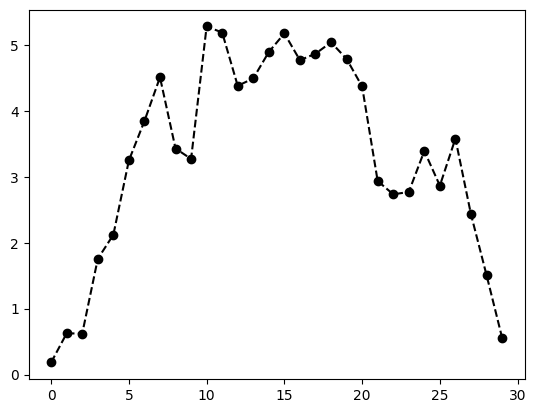

In [26]:
# Ví dụ lưu file, không tạo hình ảnh trực tiếp trong notebook output
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o");
# fig.savefig("figpath.svg") 
# fig.savefig("figpath.png", dpi=400)

### Cấu hình matplotlib
<hr>

`matplotlib` đi kèm với các lược đồ màu và các giá trị mặc định hướng đến việc chuẩn bị cho các hình sẵn sàng lưu vào máy. Hầu như tất cả các tham số mặc định đều có thể được tùy chỉnh thông qua các tham số toàn cục quy định kích thước hình, khoảng cách subplot, màu sắc, kích thước phông chữ, kiểu lưới, v.v. Một cách để sửa đổi cấu hình theo chương trình từ Python là sử dụng phương thức `rc`; ví dụ, để đặt kích thước hình mặc định toàn cục là 10 × 10, bạn có thể nhập:

`plt.rc("figure", figsize=(10, 10))`

Tất cả các cài đặt cấu hình hiện tại được tìm thấy trong từ điển `plt.rcParams`, và chúng có thể được khôi phục về giá trị mặc định bằng cách gọi hàm `plt.rcdefaults()`.

Đối số đầu tiên cho `rc` là thành phần bạn muốn tùy chỉnh, chẳng hạn như `"figure"`, `"axes"`, `"xtick"`, `"ytick"`, `"grid"`, `"legend"`, hoặc nhiều thành phần khác. Sau đó có thể là một chuỗi các tham số từ khóa cho biết các tham số mới. Một cách thuận tiện để viết các tùy chọn trong chương trình của bạn là dưới dạng một từ điển:

`plt.rc("font", family="monospace", weight="bold", size=8)`

Để tùy chỉnh rộng hơn và xem danh sách tất cả các tùy chọn, matplotlib đi kèm với một tệp cấu hình `matplotlibrc` trong thư mục `matplotlib/mpl-data`. Nếu bạn tùy chỉnh tệp này và đặt nó trong thư mục chính của mình với tên `.matplotlibrc`, nó sẽ được tải mỗi khi bạn sử dụng matplotlib.

Như chúng ta sẽ thấy trong phần tiếp theo, thư viện `seaborn` có một số chủ đề hoặc kiểu đồ thị tích hợp sẵn sử dụng hệ thống cấu hình của matplotlib bên trong.

## Vẽ đồ thị với pandas và seaborn
<hr>

`matplotlib` là một công cụ trực quan hóa dữ liệu ở mức độ khá cơ bản. Giống như bạn đang *lắp ráp* một đồ thị từ các thành phần cơ bản của nó bao gồm: hiển thị dữ liệu, chú giải, tiêu đề, nhãn vạch chia và các chú thích khác.

Trong `pandas`, chúng ta có thể có nhiều cột dữ liệu, cùng với các chỉ số tên hàng và tên cột. Bản thân `pandas` có các phương thức tích hợp sẵn giúp đơn giản hóa việc tạo hình trực quan từ các đối tượng `DataFrame` và `Series`. Một thư viện khác là `seaborn`, một thư viện đồ họa thống kê cấp cao được xây dựng trên `matplotlib`. Ưu điểm của seaborn là đơn giản hóa việc tạo nhiều loại hình trực quan phổ biến.

### Đồ thị đường
<hr>

`Series` và `DataFrame` của `pandas` có một thuộc tính `plot` để tạo một số loại đồ thị cơ bản. Theo mặc định, `plot()` tạo đồ thị đường:

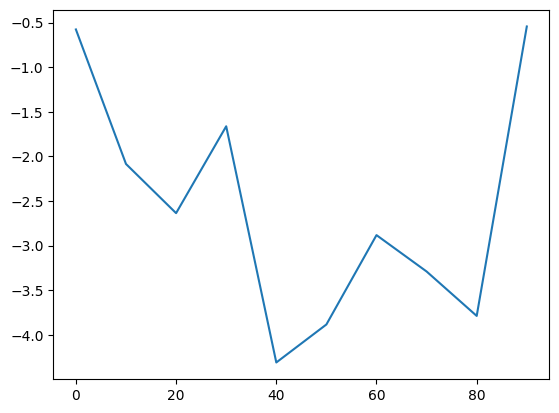

In [31]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()
plt.show()

Chỉ số của đối tượng `Series` được truyền cho `matplotlib` để vẽ trên trục x. Bạn đọc có thể vô hiệu hóa điều này bằng cách truyền `use_index=False`. Các vạch chia và giới hạn trục x có thể được điều chỉnh bằng các tùy chọn `xticks` và `xlim`, và trục y tương ứng với `yticks` và `ylim`. Bạn đọc xem bảng ... để biết danh sách một phần các tùy chọn `plot`. Chúng tôi sẽ giải thích thêm về một vài tùy chọn trong số đó và để lại phần còn lại cho bạn đọc khám phá.

**Bảng ... các tham số phương thức Series.plot**

| Đối số      | Mô tả                                                                                                  |
|---------------|--------------------------------------------------------------------------------------------------------|
| `label`       | Nhãn cho chú giải đồ thị                                                                                |
| `ax`          | Đối tượng subplot matplotlib để vẽ trên đó; nếu không có gì được truyền, sử dụng subplot matplotlib đang hoạt động |
| `style`       | Chuỗi kiểu, như `"ko--"`, được truyền cho matplotlib                                                    |
| `alpha`       | Độ trong suốt của phần tô màu đồ thị (từ 0 đến 1)                                                               |
| `kind`        | Có thể là `"area"`, `"bar"`, `"barh"`, `"density"`, `"hist"`, `"kde"`, `"line"`, hoặc `"pie"`; mặc định là `"line"` |
| `figsize`     | Kích thước của đối tượng hình để tạo                                                                      |
| `logx`        | Truyền `True` để chia tỷ lệ logarit trên trục x; truyền `"sym"` cho logarit đối xứng cho phép các giá trị âm |
| `logy`        | Truyền `True` để chia tỷ lệ logarit trên trục y; truyền `"sym"` cho logarit đối xứng cho phép các giá trị âm |
| `title`       | Tiêu đề để sử dụng cho đồ thị                                                                            |
| `use_index`   | Sử dụng chỉ mục đối tượng cho các nhãn vạch chia                                                            |
| `rot`         | Xoay các nhãn vạch chia (0 đến 360)                                                                      |
| `xticks`      | Các giá trị để sử dụng cho các vạch chia trục x                                                               |
| `yticks`      | Các giá trị để sử dụng cho các vạch chia trục y                                                               |
| `xlim`        | Giới hạn trục x (ví dụ: `[0, 10]`)                                                                      |
| `ylim`        | Giới hạn trục y                                                                                         |
| `grid`        | Hiển thị lưới trục (tắt theo mặc định)                                                                      |

Hầu hết các phương thức vẽ đồ thị của `pandas` đều chấp nhận một tham số `ax` tùy chọn, có thể là một đối tượng đồ thị con. Điều này mang lại cho chúng ta sự linh hoạt hơn trong việc bố trí các đồ thị con trong một bố cục.

Phương thức `plot` của `DataFrame` vẽ từng cột dưới dạng một đường khác nhau trên cùng một đồ thị con đồng thời tự động tạo chú giải:

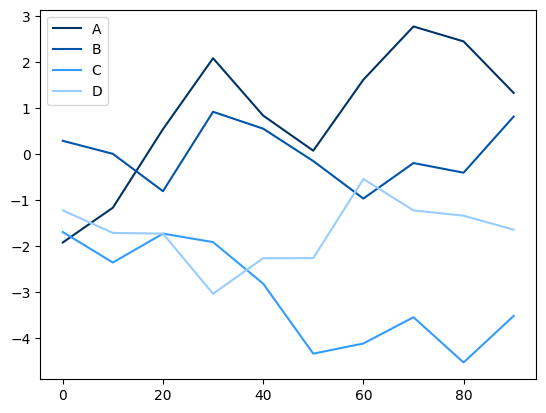

In [68]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('styles/bluestyle.txt')
df.plot()
plt.show()

**Lưu ý**

Ở đây chúng tôi đã sử dụng `plt.style.use('grayscale')` để chuyển sang một lược đồ màu phù hợp hơn cho in bản đen trắng.

Thuộc tính `plot` chứa một "họ" các phương thức cho các loại đồ thị khác nhau. Ví dụ, `df.plot()` tương đương với `df.plot.line()`. Chúng ta sẽ khám phá một số phương thức này tiếp theo.

**Lưu ý**

Các tham số từ khóa bổ sung cho `plot` được truyền qua hàm vẽ đồ thị `matplotlib` tương ứng, vì vậy bạn có thể tùy chỉnh thêm các đồ thị này bằng cách tìm hiểu thêm về API matplotlib.

`DataFrame` có một số tùy chọn cho phép một số linh hoạt về cách xử lý các cột, ví dụ, có vẽ tất cả chúng trên cùng một đồ thị con hay tạo các đồ thị con riêng biệt. Xem bảng ... để biết thêm về những điều này.

**Bảng ... các tham số plot cụ thể của DataFrame**

| Đối số          | Mô tả                                                                                      |
|-------------------|--------------------------------------------------------------------------------------------|
| `subplots`        | Vẽ mỗi cột DataFrame trong một subplot riêng biệt                                            |
| `layouts`         | Tuple 2 chiều (hàng, cột) cung cấp bố cục của các subplot                                      |
| `sharex`          | Nếu `subplots=True`, chia sẻ cùng một trục x, liên kết các vạch chia và giới hạn                   |
| `sharey`          | Nếu `subplots=True`, chia sẻ cùng một trục y                                                   |
| `legend`          | Thêm chú giải subplot (Mặc định là `True`)                                                      |
| `sort_columns`    | Vẽ các cột theo thứ tự bảng chữ cái; theo mặc định sử dụng thứ tự cột hiện có                 |

### Đồ thị cột
<hr>

`plot.bar()` và `plot.barh()` tạo các đồ thị cột dọc và cột ngang. Trong trường hợp này, chỉ số của `Series` hoặc `DataFrame` sẽ được sử dụng làm các vạch chia x (`bar`) hoặc y (`barh`):

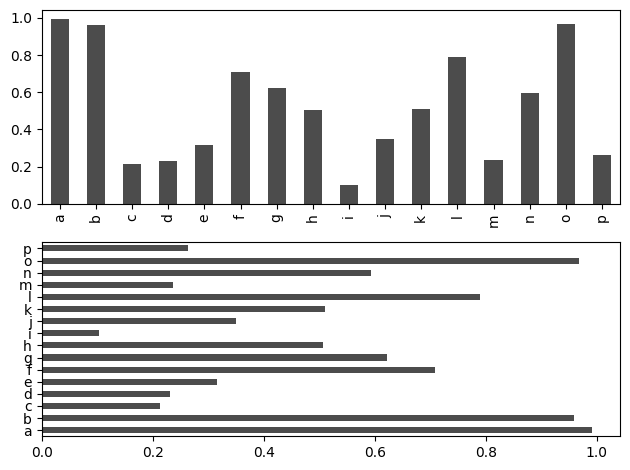

In [69]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)
plt.tight_layout() # Để các subplot không bị chồng chéo
plt.show()

Với một DataFrame, các đồ thị cột nhóm các giá trị trong mỗi hàng thành các cột, đặt cạnh nhau, cho mỗi giá trị:

In [70]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.635959,0.797098,0.269636,0.024748
two,0.649898,0.466555,0.465112,0.050632
three,0.995803,0.475282,0.485020,0.473339
four,0.963832,0.321769,0.728971,0.938951
five,0.811489,0.679918,0.522877,0.391346
six,0.216751,0.636863,0.514542,0.636732


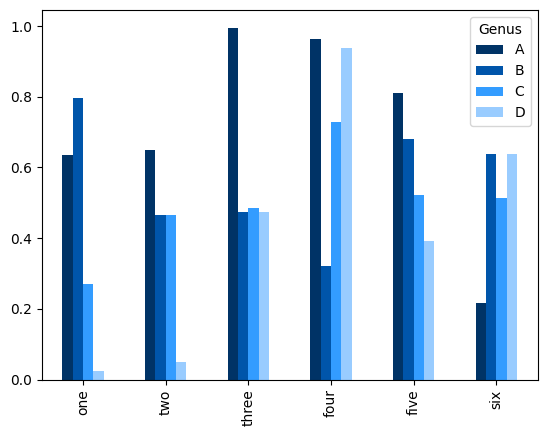

In [71]:
df.plot.bar()
plt.show()

Lưu ý rằng tên “Genus” trên các cột của `DataFrame` được sử dụng để đặt tiêu đề cho chú giải.

Chúng ta tạo các đồ thị cột xếp chồng từ một `DataFrame` bằng cách sử dụng `stacked=True`, dẫn đến giá trị trong mỗi hàng được xếp chồng lên nhau theo chiều ngang:

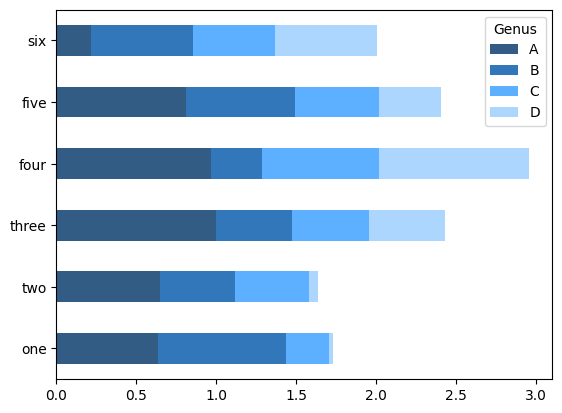

In [72]:
df.plot.barh(stacked=True, alpha=0.8)
plt.show()

**Lưu ý**

Một công thức hữu ích cho các đồ thị cột là trực quan hóa tần suất giá trị của một `Series` bằng cách sử dụng `value_counts`: `s.value_counts().plot.bar()`.

Hãy xem một ví dụ về tập dữ liệu tiền boa nhà hàng. Giả sử chúng ta muốn tạo một đồ thị cột xếp chồng hiển thị tỷ lệ phần trăm các điểm dữ liệu cho mỗi quy mô bữa tiệc cho mỗi ngày. Chúng ta tải dữ liệu bằng `read_csv` và tạo một bảng chéo theo ngày và quy mô bữa tiệc. Hàm `pandas.crosstab` là một cách thuận tiện để tính toán một bảng tần suất đơn giản từ hai cột DataFrame:

In [42]:
tips = pd.read_csv("data/tips.csv")
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
282,29.03,5.92,No,Sat,Dinner,3
283,27.18,2.00,No,Sat,Dinner,2
284,22.67,2.00,Yes,Sat,Dinner,2
285,17.82,1.75,No,Sat,Dinner,2


In [43]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,2,75,7,8,1,2
Fri,0,20,1,1,0,0
Sat,3,60,21,14,0,0
Sun,1,36,17,14,3,1


Vì có không nhiều bữa tiệc một và sáu người, chúng ta loại bỏ các giá trị này:

In [44]:
# Tiếp tục từ cell trước
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,75,7,8,1
Fri,20,1,1,0
Sat,60,21,14,0
Sun,36,17,14,3


Sau đó, để thuận tiện cho trực quan hóa, chúng ta sẽ chuẩn hóa để mỗi hàng có tổng bằng 1 trước khi tạo đồ thị:

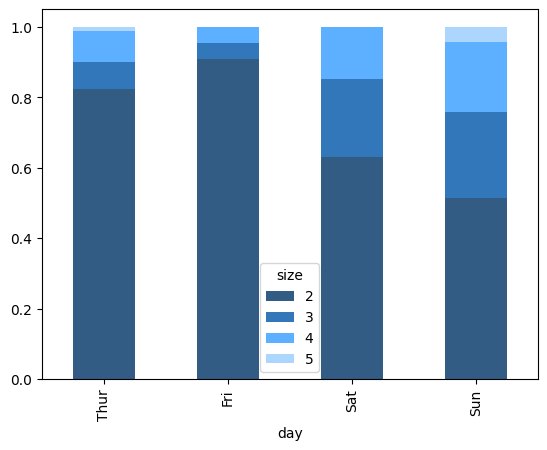

In [73]:
# Tiếp tục từ cell trước
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts.plot.bar(stacked=True, alpha = 0.8)
plt.show()

Như vậy, bạn có thể thấy rằng quy mô bữa tiệc tăng vào cuối tuần trong tập dữ liệu.

Với dữ liệu yêu cầu tổng hợp hoặc tóm tắt trước khi tạo đồ thị, việc sử dụng thư viện `seaborn` có thể làm cho mọi thứ đơn giản hơn nhiều. Hãy xem xét tỷ lệ phần trăm tiền boa theo ngày với `seaborn` như sau:

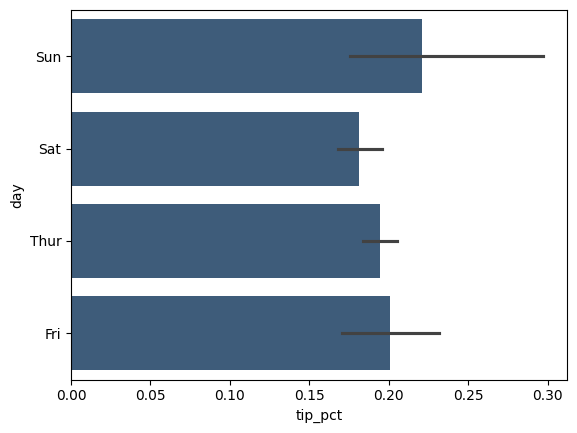

In [77]:
import seaborn as sns

tips = pd.read_csv("data/tips.csv") # Tải lại dữ liệu gốc tips
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
sns.barplot(x="tip_pct", y="day", data=tips, orient="h", alpha = 0.8)
plt.show()

Các hàm vẽ đồ thị trong seaborn nhận một tham số `data`, có thể là một `DataFrame` của `pandas`. Các tham số khác tham chiếu đến tên cột. Bởi vì có nhiều quan sát cho mỗi giá trị trong `day`, các thanh là giá trị trung bình của `tip_pct`. Các đường màu đen được vẽ trên các thanh biểu thị khoảng tin cậy 95% của giá trị trung bình.

`seaborn.barplot` có một tùy chọn `hue` cho phép chúng ta chia nhỏ theo một giá trị phân loại bổ sung:

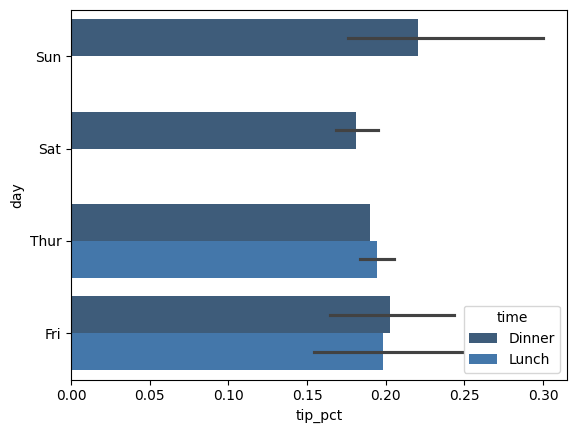

In [78]:
tips = pd.read_csv("data/tips.csv") # Tải lại dữ liệu gốc tips
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h", alpha = 0.8)
plt.show()

Lưu ý rằng seaborn đã tự động thay đổi tính thẩm mỹ của đồ thị: bảng màu mặc định, nền đồ thị và màu đường lưới. Bạn đọc có thể chuyển đổi giữa các giao diện đồ thị khác nhau bằng cách sử dụng `seaborn.set_style`:

In [79]:
sns.set_style("whitegrid")
# sns.set_palette("Greys_r") # Dòng này được đề cập trong text nhưng không có hình minh họa cụ thể sau khi chạy
# Để thấy hiệu ứng, bạn có thể chạy lại một trong các đồ thị seaborn ở trên sau khi chạy dòng này.

Khi tạo đồ thị cho các bản in đen trắng, bạn đọc có thể thấy hữu ích khi đặt bảng màu thang độ xám, như sau:

`sns.set_palette("Greys_r")`

### Biểu đồ tần suất và đồ thị hàm mật độ
<hr>

Biểu đồ tần suất, hay histogram, là một loại đồ thị cột hiển thị tần suất giá trị một cách rời rạc. Các điểm dữ liệu được chia vào các miền rời rạc, cách đều nhau và số lượng điểm dữ liệu trong mỗi miền được vẽ bằng 1 thanh có chiều cao tương đương với số lượng điểm. Sử dụng dữ liệu tiền boa từ phần trước, chúng ta có thể tạo biểu đồ tần suất tỷ lệ phần trăm tiền boa của tổng hóa đơn bằng phương thức `plot.hist` trên Series:

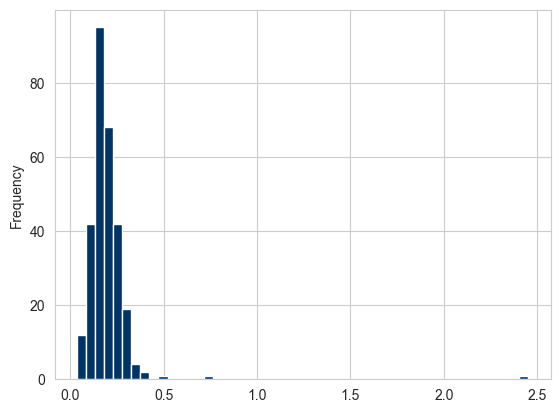

In [80]:
tips = pd.read_csv("data/tips.csv") # Tải lại dữ liệu gốc tips
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["tip_pct"].plot.hist(bins=50)
plt.show()

Một loại đồ thị liên quan là đồ thị hàm mật độ, được hình thành bằng cách tính toán ước tính của một phân phối xác suất liên tục có thể đã tạo ra dữ liệu quan sát được. Quy trình thông thường là xấp xỉ phân phối này dưới dạng hỗn hợp (mixed) của các kernel - là các phân phối đơn giản hơn như phân phối chuẩn. Do đó, các đồ thị mật độ còn được gọi là đồ thị ước tính mật độ theo kernel (KDE). Sử dụng `plot.density` tạo một đồ thị mật độ bằng cách sử dụng ước tính hỗn hợp các phân phối chuẩn thông thường như sau:

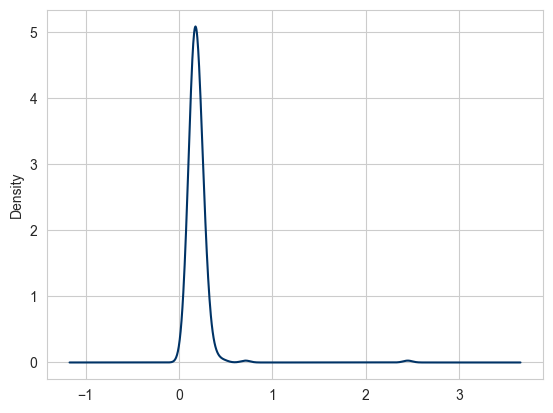

In [81]:
tips = pd.read_csv("data/tips.csv") # Tải lại dữ liệu gốc tips
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["tip_pct"].plot.density()
plt.show()

Thư viện `seaborn` giúp việc tạo biểu đồ tần suất và đồ thị mật độ trở nên dễ dàng hơn thông qua phương thức `histplot` của nó, có thể vẽ cả biểu đồ tần suất và ước tính hàm mật độ liên tục đồng thời. Ví dụ, hãy xem xét một phân phối hai mode bao gồm các lần rút từ hai phân phối chuẩn tiêu chuẩn khác nhau:

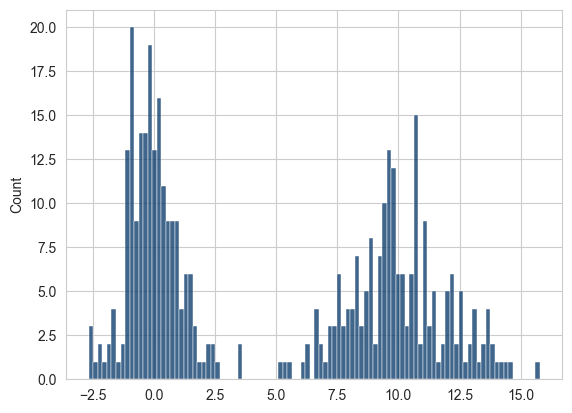

In [83]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100)
plt.show()

### Đồ thị phân tán
<hr>

Đồ thị rải điểm hoặc đồ thị phân tán là một công cụ hữu ích để kiểm tra mối quan hệ giữa hai chuỗi dữ liệu. Giả sử bạn đọc muốn mô tả mối liên hệ giữa chi phí quảng cáo qua truyền hình với doanh thu của các cửa hàng trên toàn quốc từ dữ liệu `Sales`, chúng ta có thể sử dụng đồ thị phân tán như sau

In [89]:
# Load dữ liệu
path = 'https://raw.githubusercontent.com/nguyenquanghuy85/Khdl-ktkd-python/refs/heads/main/Sales%20dataset.csv'
df = pd.read_csv(path, index_col=0, parse_dates=True)
df.head()

C:\Users\AD\AppData\Local\Temp\ipykernel_11972\4170578354.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)


,Sales,TV,Social_Media,Flyer
1,8.41,148.12,23.99,46.24
2,8.95,147.50,25.71,50.78
3,8.03,141.21,23.28,44.57
4,9.00,150.16,27.70,52.46
5,8.66,150.19,27.44,52.37


Sau đó, chúng ta có thể sử dụng phương thức `regplot` của `seaborn` để tạo một đồ thị phân tán và khớp một đường hồi quy tuyến tính:

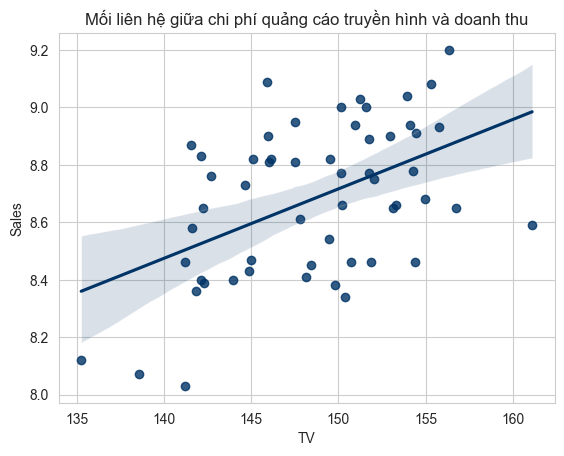

In [90]:
ax = sns.regplot(x="TV", y="Sales", data= df)
ax.set_title("Mối liên hệ giữa chi phí quảng cáo truyền hình và doanh thu")
plt.show()

Trong phân tích khai phá dữ liệu, việc có thể xem tất cả các đồ thị phân tán giữa một nhóm các biến là cần thiết. Biểu đồ thể hiện các mối liên hệ này được gọi là đồ thị cặp hoặc ma trận đồ thị phân tán. Việc tạo một đồ thị như vậy từ Python sẽ cần viết vòng lặp. Thư viện `seaborn` có hàm `pairplot` tiện lợi hỗ trợ đặt biểu đồ tần suất hoặc ước tính mật độ của mỗi biến dọc theo đường chéo:

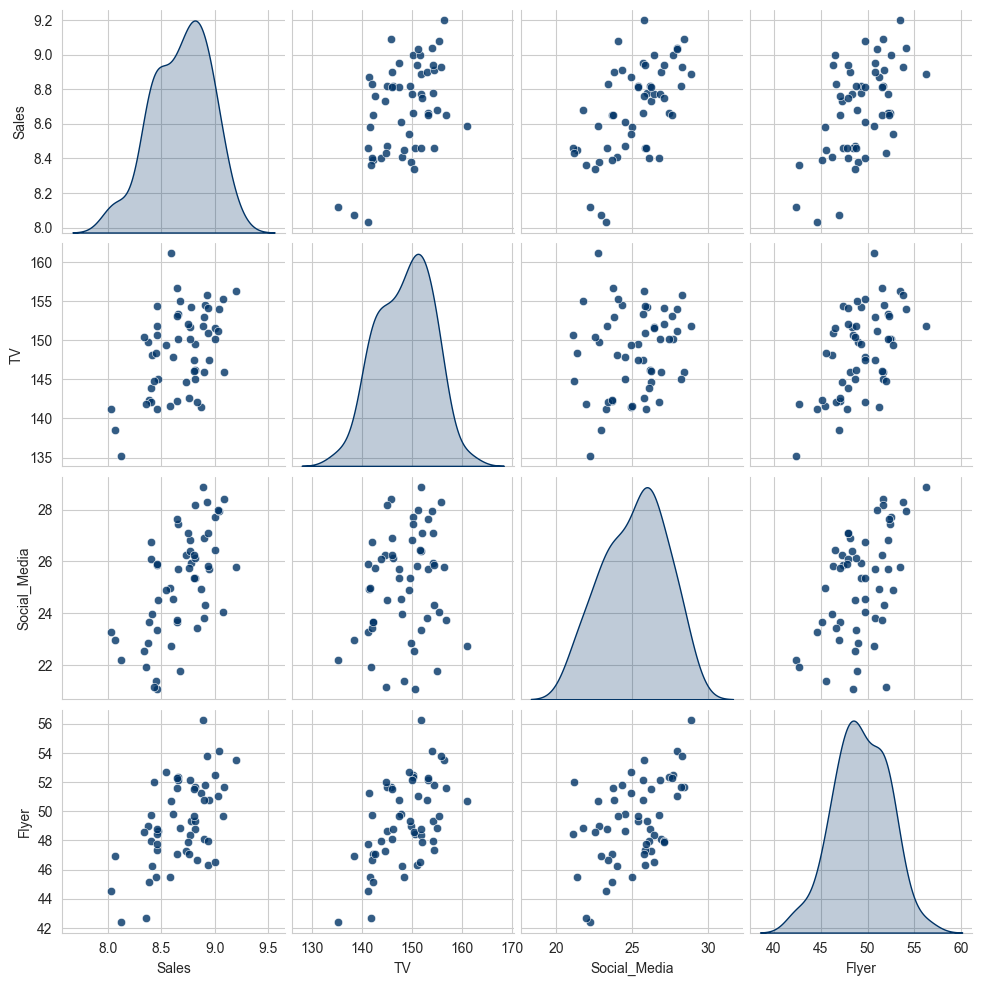

In [92]:
# Ma trận đồ thị phân tán
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.8})
plt.show()

Bạn đọc có thể nhận thấy tham số `plot_kws` cho phép chúng ta truyền các tùy chọn cấu hình xuống các lệnh gọi vẽ đồ thị riêng lẻ trên các phần tử ngoài đường chéo. Bạn đọc xem docstring của `seaborn.pairplot` để biết các tùy chọn cấu hình chi tiết hơn.

### Lưới đa điểm và dữ liệu phân loại
<hr>

Một cách để trực quan hóa dữ liệu với nhiều biến phân loại là sử dụng lưới đa diện - một bố cục hai chiều của các đồ thị trong đó dữ liệu được chia trên các đồ thị trên mỗi trục dựa trên các giá trị riêng biệt của một biến nhất định. `seaborn` có một hàm tích hợp hữu ích `catplot` giúp đơn giản hóa việc tạo nhiều loại đồ thị đa diện được chia theo các biến phân loại:

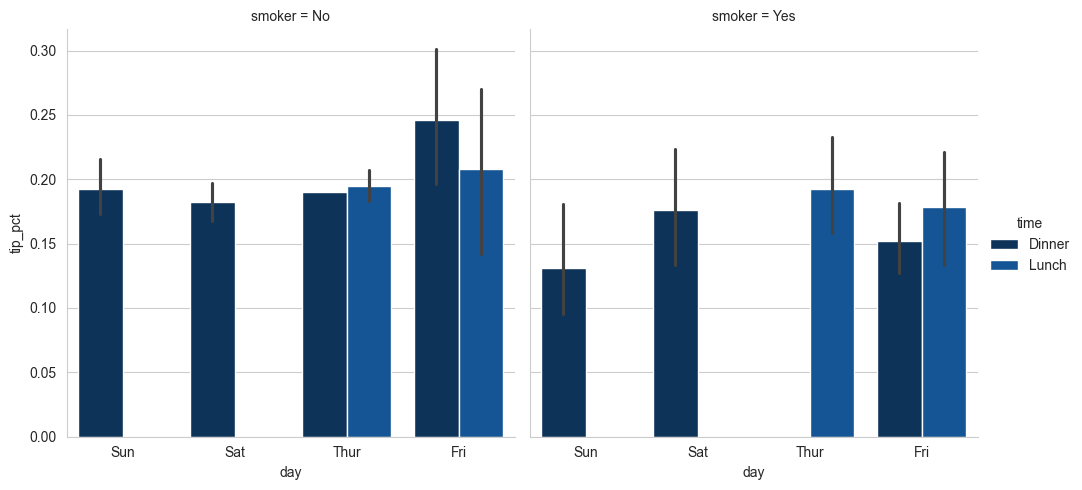

In [93]:
tips = pd.read_csv("data/tips.csv") # Tải lại dữ liệu gốc tips
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])
plt.show()

Thay vì nhóm theo `"time"` bằng các màu cột khác nhau trong một facet, chúng ta cũng có thể mở rộng lưới facet bằng cách thêm một hàng cho mỗi giá trị `time`:

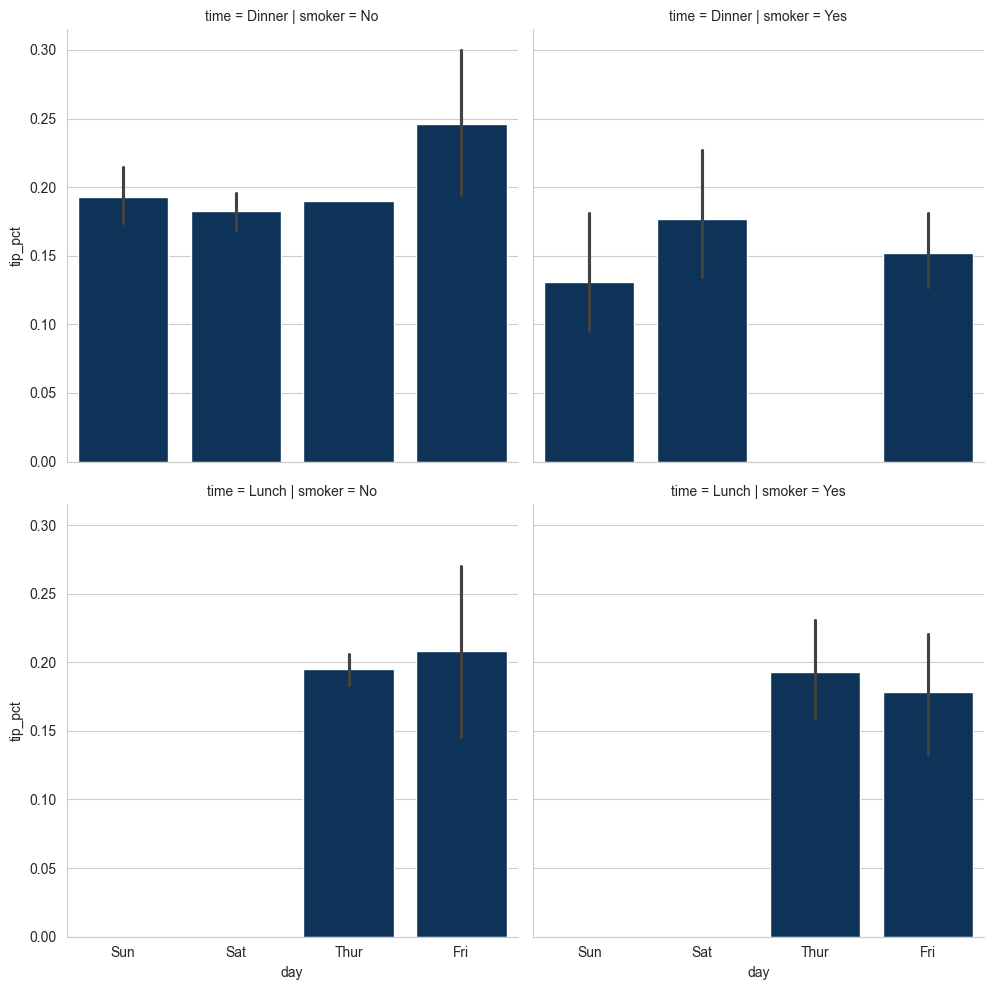

In [94]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])
plt.show()

`catplot` hỗ trợ các loại đồ thị khác có thể hữu ích tùy thuộc vào những gì bạn đang cố gắng hiển thị. Ví dụ, đồ thị hộp có thể là một loại hình trực quan hiệu quả:

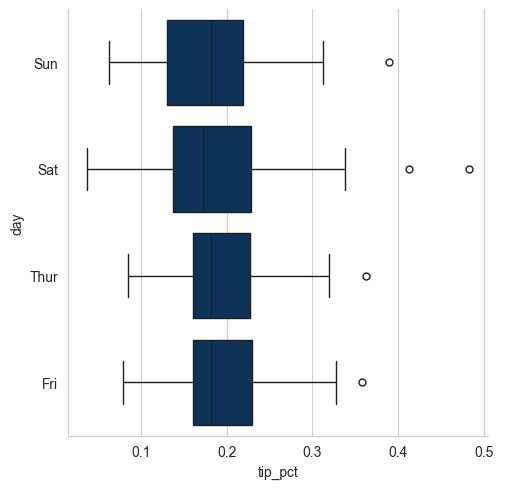

In [96]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])
plt.show()

Bạn có thể tạo các đồ thị lưới của riêng mình bằng cách sử dụng lớp `seaborn.FacetGrid` tổng quát hơn.

Python là một ngôn ngữ lập trình mã nguồn mở, vì vậy có rất nhiều lựa chọn phong phú cho việc tạo ra các biểu đồ và đồ họa. Kể từ năm 2010, cộng đồng phát triển đã đầu tư đáng kể vào việc xây dựng các công cụ cho phép tạo ra đồ họa tương tác có thể hiển thị trực tiếp trên trình duyệt web. Các thư viện tiêu biểu cho mục tiêu này bao gồm **Altair**, **Bokeh** và **Plotly**. Nhờ những công cụ này, người dùng Python có thể dễ dàng xây dựng các biểu diễn dữ liệu động và có tính tương tác cao, phục vụ tốt cho các ứng dụng web hiện đại.

Đối với các nhu cầu tạo đồ họa tĩnh — chẳng hạn như hình minh họa cho tài liệu in ấn hoặc xuất bản trên web — các thư viện như **`matplotlib`** cùng với các thư viện mở rộng như **`pandas`** và **`seaborn`** được khuyến nghị sử dụng. Đây là những công cụ mạnh mẽ, linh hoạt và đã được kiểm chứng qua thời gian cho các mục đích trực quan hóa dữ liệu trong khoa học, kinh tế và kỹ thuật.

Tuy nhiên, hệ sinh thái các công cụ trực quan hóa trong Python không ngừng phát triển và đổi mới. Vì vậy, việc tìm hiểu thêm các công cụ mới và đa dạng hóa phương pháp trực quan hóa có thể giúp bạn mở rộng khả năng phân tích và trình bày dữ liệu hiệu quả hơn.

Một tài liệu tham khảo đáng chú ý trong lĩnh vực này là cuốn sách *Fundamentals of Data Visualization* của tác giả **Claus O. Wilke**, được xuất bản bởi O'Reilly. Cuốn sách này hiện có sẵn dưới dạng bản in, đồng thời có thể truy cập miễn phí tại trang web của tác giả: [https://clauswilke.com/dataviz](https://clauswilke.com/dataviz).

Mục tiêu của chương này là cung cấp cho người học những kiến thức cơ bản ban đầu về trực quan hóa dữ liệu trong Python thông qua việc sử dụng các thư viện phổ biến như `pandas`, `matplotlib` và `seaborn`. Những công cụ này cho phép người dùng xây dựng các biểu đồ, đồ họa và hình ảnh hóa dữ liệu phục vụ cho việc khám phá, phân tích và trình bày kết quả một cách trực quan và dễ hiểu.

Trong bối cảnh ngày càng nhiều lĩnh vực ứng dụng dữ liệu trong nghiên cứu và thực tiễn, việc truyền đạt kết quả phân tích thông qua trực quan hóa hiệu quả là một kỹ năng thiết yếu. Nếu công việc của bạn đòi hỏi khả năng diễn giải dữ liệu một cách trực quan, bạn nên đầu tư thời gian tìm hiểu thêm về các nguyên tắc thiết kế và công cụ trực quan hóa dữ liệu tiên tiến. Đây là một lĩnh vực đang phát triển mạnh mẽ, với nhiều tài nguyên học tập phong phú có sẵn trên Internet và dưới dạng sách chuyên khảo.

Trong chương tiếp theo, chúng ta sẽ tập trung vào các kỹ thuật xây dựng mô hình trên dữ liệu, từ những phương pháp cơ bản đến các kỹ thuật nâng cao. Nội dung chương sẽ bao gồm việc lựa chọn mô hình phù hợp, huấn luyện mô hình trên dữ liệu, đánh giá hiệu quả dự đoán, và tối ưu hóa hiệu suất thông qua các công cụ trong hệ sinh thái Python. Đây là bước quan trọng trong quy trình phân tích dữ liệu, cho phép chuyển hóa dữ liệu thành tri thức có khả năng dự đoán và hỗ trợ ra quyết định.